In [67]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import FK5
from astropy.time import Time
import gal_altaz
import ugradio

In [94]:
def galtora(l, b):
    _ten = SkyCoord(l=l*u.degree, b=b*u.degree, frame='galactic')
    _teneq = _ten.fk5
    _teneq.transform_to(FK5(equinox='J2019'))
    _tenra = _teneq.ra.degree
    _tendec = _teneq.dec.degree
    return _tenra, _tendec

In [95]:
l = np.empty([20, 66])
b = np.empty([20, 66])

In [96]:
l[0][1]

4.3246143049158653e-316

In [97]:
lon = np.arange(-10, 254, step=4)
lat = np.arange(-20, 21, 2)

In [98]:
for i in range(len(l)):
    for j in range(len(l[i])):
        l[i][j] = lon[j]

In [99]:
l

array([[ -10.,   -6.,   -2., ...,  242.,  246.,  250.],
       [ -10.,   -6.,   -2., ...,  242.,  246.,  250.],
       [ -10.,   -6.,   -2., ...,  242.,  246.,  250.],
       ..., 
       [ -10.,   -6.,   -2., ...,  242.,  246.,  250.],
       [ -10.,   -6.,   -2., ...,  242.,  246.,  250.],
       [ -10.,   -6.,   -2., ...,  242.,  246.,  250.]])

In [100]:
for i in range(len(b)):
    for j in range(len(b[i])):
        b[i][j] = lat[i]

In [101]:
b

array([[-20., -20., -20., ..., -20., -20., -20.],
       [-18., -18., -18., ..., -18., -18., -18.],
       [-16., -16., -16., ..., -16., -16., -16.],
       ..., 
       [ 14.,  14.,  14., ...,  14.,  14.,  14.],
       [ 16.,  16.,  16., ...,  16.,  16.,  16.],
       [ 18.,  18.,  18., ...,  18.,  18.,  18.]])

In [102]:
ra = np.empty([20, 66])
dec = np.empty([20, 66])

In [103]:
for i in range(len(b)):
    for j in range(len(b[i])):
        ra[i][j] = galtora(l[i][j], b[i][j])[0]
        dec[i][j] = galtora(l[i][j], b[i][j])[1]

In [104]:
ra

array([[ 283.90371967,  285.61136653,  287.24203645, ...,   96.17799727,
          97.73663565,   99.3397455 ],
       [ 281.18458295,  283.05363761,  284.82094361, ...,   98.43461114,
         100.10124617,  101.83101944],
       [ 278.53364047,  280.55247832,  282.44732425, ...,  100.6540112 ,
         102.42197741,  104.27022456],
       ..., 
       [ 246.83210401,  249.69051096,  252.35543749, ...,  129.760038  ,
         132.18148571,  134.76403598],
       [ 245.16421487,  248.00544481,  250.65842465, ...,  131.46934973,
         133.88287834,  136.45518284],
       [ 243.53655283,  246.35459868,  248.98995572, ...,  133.15773255,
         135.55824079,  138.11480051]])

In [105]:
dec

array([[-46.51829028, -42.96043836, -39.40752408, ..., -34.21349569,
        -37.75444845, -41.3041437 ],
       [-45.84302512, -42.28351992, -38.72434696, ..., -33.51415746,
        -37.06697572, -40.62483668],
       [-45.10485909, -41.55100991, -37.99220882, ..., -32.77457505,
        -36.33343124, -39.89310495],
       ..., 
       [-28.54686742, -25.61617741, -22.59157161, ..., -18.01360611,
        -21.15373967, -24.2177133 ],
       [-27.19545441, -24.32514116, -21.35724901, ..., -16.85573021,
        -19.94457606, -22.95356422],
       [-25.82478028, -23.01588137, -20.10616559, ..., -15.68387696,
        -18.71946044, -21.67182427]])

In [106]:
def ratoalt(ra, dec, t):
    lat = ugradio.leo.lat
    lon = ugradio.leo.lon
    alt = ugradio.leo.alt
    t = astropy.time.Time(t,format='isot', scale='utc')
    l = astropy.coordinates.EarthLocation(lat=lat*u.deg, lon=lon*u.deg,height=alt*u.m)
    f = astropy.coordinates.AltAz(obstime=t,location=l)
    equinox='J2019'
    c = astropy.coordinates.SkyCoord(ra, dec, frame='fk5',unit='deg',equinox=equinox)
    altaz = c.transform_to(f)
    return altaz.alt.degree, altaz.az.degree

In [167]:
two = Time('2019-04-17T11:00:00', format='isot', scale='utc')
alt2 = np.empty([20, 66])
az2 = np.empty([20, 66])
for i in range(len(alt2)):
    for j in range(len(alt2[i])):
        altaz = ratoalt(ra[i][j], dec[i][j], two)
        alt2[i][j] = altaz[0]
        az2[i][j] = altaz[1]

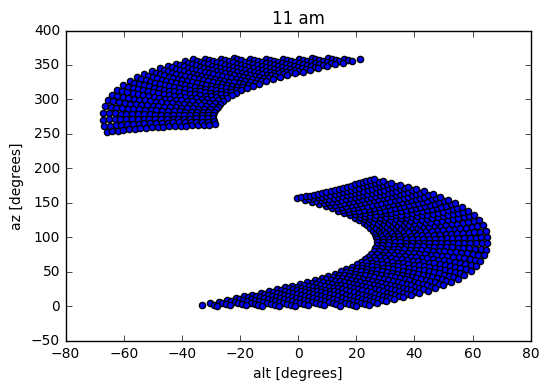

In [168]:
%matplotlib inline
plt.scatter(alt2.flatten(), az2.flatten())
plt.title('11 am')
plt.xlabel('alt [degrees]')
plt.ylabel('az [degrees]')
plt.show()

In [154]:
nine = Time('2019-04-17T9:00:00', format='isot', scale='utc')
alt9 = np.empty([20, 66])
az9 = np.empty([20, 66])
for i in range(len(alt9)):
    for j in range(len(alt9[i])):
        altaz = ratoalt(ra[i][j], dec[i][j], nine)
        alt9[i][j] = altaz[0]
        az9[i][j] = altaz[1]

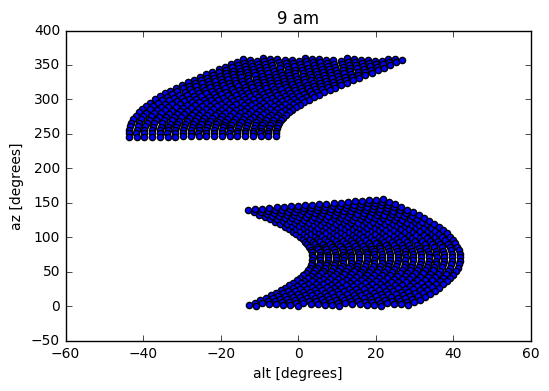

In [161]:
%matplotlib inline
plt.scatter(alt9.flatten(), az9.flatten())
plt.title('9 am')
plt.xlabel('alt [degrees]')
plt.ylabel('az [degrees]')
plt.show()

In [156]:
six = Time('2019-04-17T18:00:00', format='isot', scale='utc')
alt6 = np.empty([20, 66])
az6 = np.empty([20, 66])
for i in range(len(alt6)):
    for j in range(len(alt6[i])):
        altaz = ratoalt(ra[i][j], dec[i][j], six)
        alt6[i][j] = altaz[0]
        az6[i][j] = altaz[1]

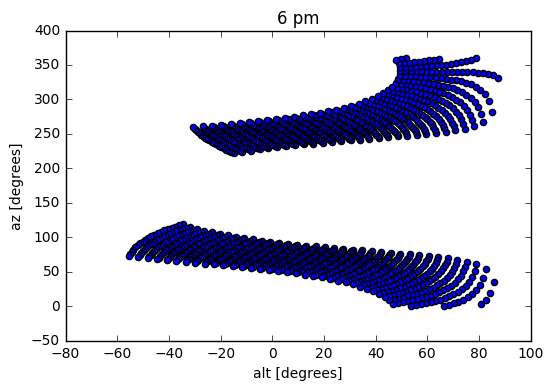

In [162]:
%matplotlib inline
plt.scatter(alt6.flatten(), az6.flatten())
plt.title('6 pm')
plt.xlabel('alt [degrees]')
plt.ylabel('az [degrees]')
plt.show()

In [158]:
eight = Time('2019-04-17T20:00:00', format='isot', scale='utc')
alt8 = np.empty([20, 66])
az8 = np.empty([20, 66])
for i in range(len(alt8)):
    for j in range(len(alt8[i])):
        altaz = ratoalt(ra[i][j], dec[i][j], eight)
        alt8[i][j] = altaz[0]
        az8[i][j] = altaz[1]

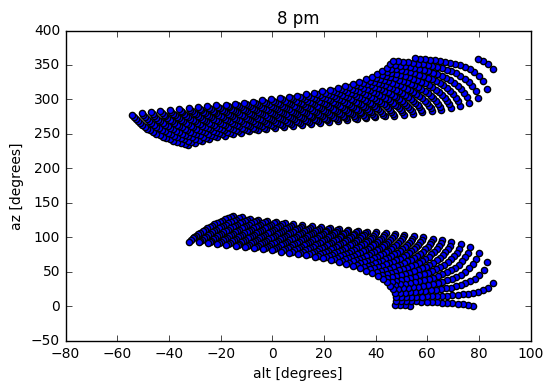

In [164]:
%matplotlib inline
plt.scatter(alt8.flatten(), az8.flatten())
plt.title('8 pm')
plt.xlabel('alt [degrees]')
plt.ylabel('az [degrees]')
plt.show()

In [165]:
three = Time('2019-04-17T3:00:00', format='isot', scale='utc')
alt3 = np.empty([20, 66])
az3 = np.empty([20, 66])
for i in range(len(alt3)):
    for j in range(len(alt3[i])):
        altaz = ratoalt(ra[i][j], dec[i][j], three)
        alt3[i][j] = altaz[0]
        az3[i][j] = altaz[1]

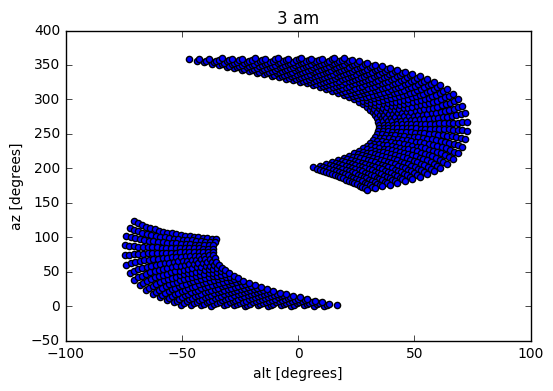

In [166]:
%matplotlib inline
plt.scatter(alt3.flatten(), az3.flatten())
plt.title('3 am')
plt.xlabel('alt [degrees]')
plt.ylabel('az [degrees]')
plt.show()